## Goals for HPCC/RCC: 
1. Run full brain scans through my program
1. Determine significant differences between various regions 
    1. Look at density, cell size, roundness etc. in sections (maybe squares, 10 by 10)
    1. Calculate averages 

In [3]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray

fig, ax = try_all_threshold(nucl, figsize=(6, 8), verbose=False)
plt.show()

fig.savefig('Nucl_Try_All_Threshold')

NameError: name 'nucl' is not defined

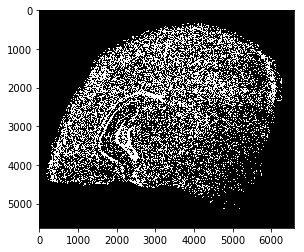

In [4]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_mean

imname = 'confocal_20x_scan_16_blue.png'
img = skimage.io.imread(imname)

nucl = img[:, :, 2]

thresh = threshold_mean(nucl)
binary = nucl > thresh

plt.imshow(binary, cmap='gray')
plt.show()

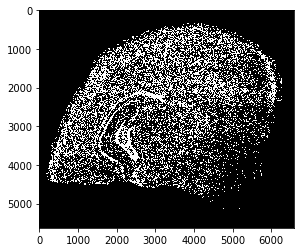

In [5]:
from skimage.morphology import remove_small_objects

clim = remove_small_objects(binary, min_size=30)
plt.imshow(clim, cmap='gray')
plt.show()

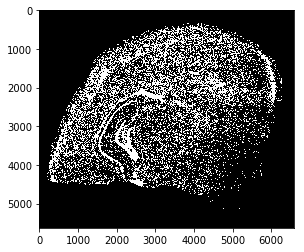

In [6]:
from skimage.filters.rank import median
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

fill_cells = median(ndi.binary_fill_holes(clim), disk(2))
plt.imshow(fill_cells, cmap='gray')
plt.show()

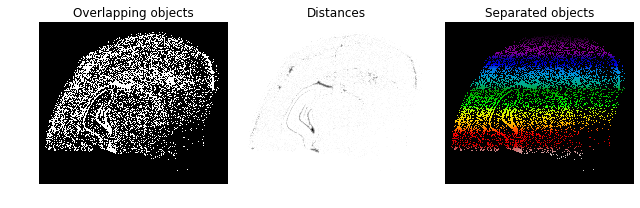

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(fill_cells)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((5,5)),
                            labels=fill_cells)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=fill_cells)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(fill_cells, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()
 
fig.savefig('Watershed.png')

Download Image:
1. Download from Google Drive
2. Upload to this folder
3. Assign each 10 by 10 box a brain region

In [8]:
import numpy as np
import math as m

props = skimage.measure.regionprops(labels)

numobj = labels.max()

objects = np.zeros((numobj, 5)) #rows, columns

i = 0 
while i < numobj:
    #objects[i,0] = (i + 1)
    objects[i,0] = props[i].centroid[0] #x-coordinate
    objects[i,1] = props[i].centroid[1] #y-coordinate
    objects[i,2] = props[i].area
    objects[i,3] = props[i].perimeter  
    objects[i,4] = ((props[i].perimeter)**2)/(4*m.pi*props[i].area)
    i = i + 1

In [9]:
import pandas as pd
cells = pd.DataFrame(data=objects[0:,0:], columns=['X-Coordinate', 'Y-Coordinate', 'Area', 'Perimeter', 'Spherical'])

In [10]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_mean
from skimage.filters import try_all_threshold

imname = '16_cortex.png'
img = skimage.io.imread(imname)

img2D = img[:, :, 0]

#thresh = try_all_(img2D)
binary = img2D > 0

import scipy.ndimage as ndimage
cortex = ndimage.binary_fill_holes(binary).astype(int)

In [11]:
imname = '16_caudateputamen.png'
img = skimage.io.imread(imname)
img2D = img[:, :, 0]
binary = img2D > 0
caudateputamen = ndimage.binary_fill_holes(binary).astype(int)

In [12]:
imname = '16_corpuscallosum.png'
img = skimage.io.imread(imname)
img2D = img[:, :, 0]
binary = img2D > 0
corpuscallosum = ndimage.binary_fill_holes(binary).astype(int)

In [13]:
imname = '16_hippocampus.png'
img = skimage.io.imread(imname)
img2D = img[:, :, 0]
binary = img2D > 0
hippocampus = ndimage.binary_fill_holes(binary).astype(int)

In [14]:
imname = '16_hypothalamus.png'
img = skimage.io.imread(imname)
img2D = img[:, :, 0]
binary = img2D > 0
hypothalamus = ndimage.binary_fill_holes(binary).astype(int)

In [15]:
imname = '16_thalamus.png'
img = skimage.io.imread(imname)
img2D = img[:, :, 0]
binary = img2D > 0
thalamus = ndimage.binary_fill_holes(binary).astype(int)

In [16]:
cells.shape
cells.loc[:,'X-Coordinate']

0          325.916667
1          326.500000
2          328.000000
3          327.090909
4          329.500000
5          329.038462
6          331.608696
7          334.542373
8          334.884615
9          337.200000
10         339.843750
11         341.575000
12         339.900000
13         339.933333
14         341.933333
15         343.066667
16         343.040000
17         344.060606
18         344.777778
19         344.526316
20         345.170732
21         345.673077
22         346.000000
23         346.945946
24         347.500000
25         346.770833
26         346.620690
27         348.577778
28         348.583333
29         347.920000
             ...     
120159    5104.885714
120160    5104.477273
120161    5115.314286
120162    5117.148148
120163    5122.825000
120164    5120.709677
120165    5122.424242
120166    5122.722222
120167    5125.451613
120168    5125.925926
120169    5127.697368
120170    5127.320000
120171    5130.939394
120172    5132.428571
120173    

In [17]:
cell_x = int(cells.loc[400,'X-Coordinate'])
cell_y = int(cells.loc[400,'Y-Coordinate'])

In [20]:
cortex[cell_x, cell_y]

1

In [21]:
import pandas as pd
region = np.zeros((numobj, 1))
regions = pd.DataFrame(data=region[0:,0:], columns=['Region'])

In [22]:
result = pd.concat([cells, regions], axis=1, sort=False)

In [23]:
region = np.zeros((numobj, 1)) #rows, columns

j = 0 
while j < numobj:
    cell_x = int(cells.loc[j,'X-Coordinate'])
    cell_y = int(cells.loc[j,'Y-Coordinate'])
    if (cortex[cell_x, cell_y]==1):
        result.loc[j,'Region'] = 'Cortex'
    if (caudateputamen[cell_x, cell_y]==1):
        result.loc[j,'Region'] = 'Caudate Putamen'
    if (corpuscallosum[cell_x, cell_y]==1):
        result.loc[j,'Region'] = 'Corpus Callosum'
    if (hippocampus[cell_x, cell_y]==1):
        result.loc[j,'Region'] = 'Hippocampus'
    if (hypothalamus[cell_x, cell_y]==1):
        result.loc[j,'Region'] = 'Hypothalamus'
    if (thalamus[cell_x, cell_y]==1):
        result.loc[j,'Region'] = 'Thalamus'
    j = j + 1

In [86]:
result

,X-Coordinate,Y-Coordinate,Area,Perimeter,Spherical,Region
0,325.916667,3763.333333,12.0,12.207107,0.988176,0
1,326.500000,3758.500000,4.0,4.000000,0.318310,0
2,328.000000,3756.222222,9.0,7.449747,0.490717,0
3,327.090909,3779.636364,11.0,9.414214,0.641159,0
4,329.500000,3754.500000,4.0,4.000000,0.318310,0
5,329.038462,3781.884615,26.0,19.656854,1.182619,Cortex
6,331.608696,3798.000000,23.0,16.828427,0.979827,Cortex
7,334.542373,3805.576271,59.0,29.142136,1.145462,Cortex
8,334.884615,4080.153846,26.0,16.242641,0.807477,0
9,337.200000,3863.771429,35.0,20.242641,0.931658,Cortex


In [31]:
test = pd.DataFrame({'name': ['Raphael', 'Donatello'],'mask': ['red', 'purple'],'weapon': ['sai', 'bo staff']})
csv = test.to_csv(index=False)

In [33]:
result_csv = result.to_csv(index=False)

In [32]:
file = open('testfile.txt','w') 
 
file.write(csv)
 
file.close() 

In [34]:
file = open('result.txt','w') 
 
file.write(result_csv)
 
file.close() 

In [101]:
cortex_cells = pd.DataFrame()
cortex_cells

""


In [2]:
k = 0 
while k < 400:
    if (result['Region'].str.contains('Cortex').loc[k]):
        in_region = result.loc[k,:]
        cortex_cells = cortex_cells.append(in_region, ignore_index=True)
    print(k)
    k = k + 1

NameError: name 'result' is not defined

In [141]:
hippocampus_cells = pd.DataFrame()

l = 0 
while l < numobj:
    if (result['Region'].str.contains('Hippocampus').loc[l]):
        in_region2 = result.loc[l,:]
        hippocampus_cells = hippocampus_cells.append(in_region2, ignore_index=True)
    l = l + 1

In [142]:
caudateputamen_cells = pd.DataFrame()

m = 0 
while m < numobj:
    if (result['Region'].str.contains('Caudate Putamen').loc[m]):
        in_region3 = result.loc[m,:]
        caudateputamen_cells = caudateputamen_cells.append(in_region3, ignore_index=True)
    m = m + 1

In [143]:
hypothalamus_cells = pd.DataFrame()

n = 0 
while n < numobj:
    if (result['Region'].str.contains('Hypothalamus').loc[n]):
        in_region4 = result.loc[n,:]
        hypothalamus_cells = hypothalamus_cells.append(in_region4, ignore_index=True)
    n = n + 1

In [1]:
hippocampus_cells

NameError: name 'hippocampus_cells' is not defined